## Feature Engineering:

Extract titles from the Name column (e.g., Mr., Mrs., Miss) to create a new feature (Title).

Create a family size feature: FamilySize = SibSp + Parch + 1.

Bin ages into categories (Child, Teenager, Adult, Senior) for better analysis.

## Questions to Solve
1. What is the percentage of survivors on the Titanic?

2. How does survival rate vary across Pclass and Sex?

3. What is the correlation between Fare and survival?

4. What is the impact of family size (FamilySize) on survival rates?

5. Are passengers who embarked from certain locations more likely to survive?

6. How does age distribution impact survival?

## Advanced Analysis
Lets dive deeper into the dataset using machine learning models or advanced statistical techniques.

#### Additional Questions:
 Can you predict survival using logistic regression or decision trees?

 What is the importance of each feature in predicting survival?

#### Visualization in Power BI
Use Power BI for interactive dashboards and comparisons:

### Suggested Visualizations:
Overall Survival Rate:

Create a pie chart showing the percentage of survivors vs non-survivors.

Survival by Gender and Class:

Use a stacked bar chart to show survival rates broken down by gender and passenger class.

Age Distribution:

Create a histogram or line chart comparing age distributions of survivors vs non-survivors.

Fare Analysis:

Use a scatter plot to analyze the relationship between fare and survival.

Geographic Analysis of Embarkation Ports:

Use a map visualization to show survival rates by embarkation port (Embarked_country).

Family Size Impact:

Create a bar chart showing survival rates for different family sizes.




In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df1 = df.dropna(axis=1)

In [7]:
df1.shape

(891, 9)

In [8]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


In [9]:
df.shape

(891, 12)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Creating family column

df['family_size'] = df['SibSp'] + df['Parch'] + 1

In [12]:
df['family_size'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [13]:
df['Pclass'].unique()

array([3, 1, 2])

In [14]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2


In [15]:
df['Title'] = df['Name'].str.extract(r'([A-Za-z]+)\.')

In [16]:
#Mappping title with ('Man' 'Married_Woman' 'Single_Woman' 'Boy')


#print(len('Title_'))
#print(len(df))

print(df['Title'].unique())  # Assuming your title column in df is named 'Title'


# Example cleaning steps (apply as needed based on your findings)
df['Title_Cleaned'] = df['Title'].str.strip()
df['Title_Cleaned'] = df['Title_Cleaned'].str.lower() # Or .str.upper()

title_mapping_updated = {
    'mr': 'Man',
    'mr.': 'Man',  # Example for punctuation
    'don': 'Man',
    'sir': 'Man',
    'major': 'Man',
    'col': 'Man',
    'capt': 'Man',
    'rev': 'Man',
    'dr': 'Man',
    'jonkheer': 'Man',
    'mrs': 'Married_Woman',
    'mme': 'Married_Woman',
    'lady': 'Married_Woman',
    'countess': 'Married_Woman',
    'miss': 'Single_Woman',
    'mlle': 'Single_Woman',
    'ms': 'Single_Woman',
    'master': 'Boy',
    'mstr': 'Boy' # Example for abbreviation/typo
}
# Now map from the cleaned title column
mapped_title = df['Title_Cleaned'].map(title_mapping_updated).fillna('other')
df['mapped_title'] = mapped_title
print(df['mapped_title'].isnull().sum())
print(df['mapped_title'].unique())


['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
0
['Man' 'Married_Woman' 'Single_Woman' 'Boy']


In [17]:
df.drop('PassengerId',inplace=True,axis=1)

In [18]:
df.drop('Title',inplace=True, axis=True)

In [19]:
df.drop('Cabin',inplace=True,axis=1)

In [20]:
df['mapped_title'].unique()

array(['Man', 'Married_Woman', 'Single_Woman', 'Boy'], dtype=object)

In [21]:
#Creating Emabarked country from Embarked column

Embarked_country_mapping = {
    'C' : 'France',
    'Q' : 'Ireland',
    'S' : 'England'
}
#Creating new Embarked country using maping
df['Embarked_country'] = df['Embarked'].map(Embarked_country_mapping)


In [22]:
grouped_data = df.groupby('Embarked_country')[['Survived','mapped_title']].value_counts().unstack(fill_value=0).astype(int)

In [23]:
grouped_data

mapped_title               Boy  Man  Married_Woman  Single_Woman
Embarked_country Survived                                       
England          0          13  351             21            42
                 1          18   60             70            69
France           0           0   66              3             6
                 1           5   24             30            34
Ireland          0           4   34              2             7
                 1           0    3              1            26

In [24]:
#Filling 2 NaN in Embarked_country column with mode
df['Embarked_country'] = df['Embarked_country'].fillna(df['Embarked_country'].mode()[0])

In [25]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,Title_Cleaned,mapped_title,Embarked_country
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,mr,Man,England
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,mrs,Married_Woman,France


In [26]:
#predicting Age using Regression Model

#1st step 

feature = ['Pclass','Sex','SibSp','Parch','Fare','Embarked']
target = 'Age'

#Encode Catorigal data

label_encoders = {}

for column in ['Sex','Embarked']:
    if column in df.columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        label_encoders[column] = le

#saperate data into known and missing data

known_age = df[df['Age'].notna()].copy()
unknown_age = df[df['Age'].isna()].copy()

#Prepare features and target of traning
X_known = known_age[feature]
y_known = known_age[target]
X_unknown = unknown_age[feature]

#Train the regression model (Random Forest)

model = RandomForestRegressor(random_state=42)
model.fit(X_known , y_known)

predicted_age = model.predict(X_unknown)

df['predict_age_imputed'] = df['Age']

df.loc[df['predict_age_imputed'].isna(), 'predict_age_imputed'] = predicted_age

In [27]:
#Bin ages into categories (Child, Teenager, Adult, Senior) for better analysis.

#Define the bin edges (the boundries of categories)
bins = [0,12,19,60,float('inf')]

#Define the category labels
labels = ['child','teenager','adult','senior']

#using the pd.cut() to bin the Age column
df['Age Category'] = pd.cut(df['predict_age_imputed'], bins=bins,labels=labels,right=False)

In [28]:
df.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,Title_Cleaned,mapped_title,Embarked_country,predict_age_imputed,Age Category
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,2,2,mr,Man,England,22.0,adult


In [29]:
#df.drop('Mean Age',inplace =True,axis=1)

In [30]:
#Mean of age to compare with predict age
mean_age = df['Age'].mean()

df['age_mean_imputed'] = df['Age']
df['age_mean_imputed'] = df['age_mean_imputed'].fillna(mean_age)

In [31]:
df.rename(columns={'Title_Cleaned':'Title'},inplace=True)

In [32]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,Title,mapped_title,Embarked_country,predict_age_imputed,Age Category,age_mean_imputed
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,2,mr,Man,England,22.0,adult,22.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,2,mrs,Married_Woman,France,38.0,adult,38.0


In [33]:
#print(f"Mean of Predict Age where null values is filled with Regression Model :- {df['predict_age'].mean()}")
#print(f"Mean of Age where null values is fill with mean :- {df['Mean Age'].mean()}")

"#Box plot\nplt.figure(figsize=(8,5))\nsns.boxenplot(data=df[['predict_age','age_mean_imputed']])\nplt.ylabel('Age')"

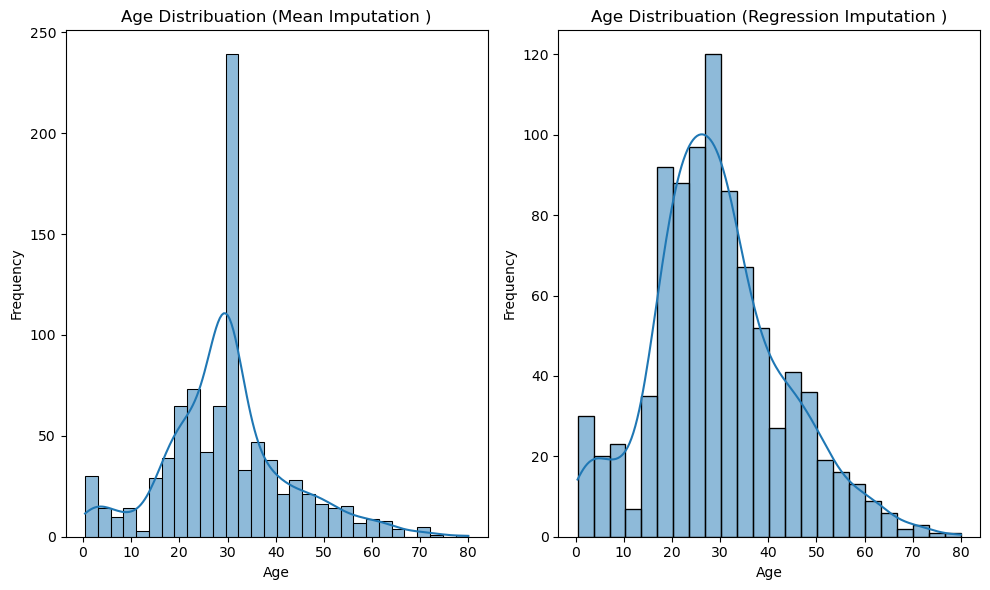

In [34]:
#creating The plot difference between predict_age_imputed age_mean_imputed

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.histplot(df['age_mean_imputed'],kde=True)
plt.title('Age Distribuation (Mean Imputation )')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(df['predict_age_imputed'],kde=True)
plt.title('Age Distribuation (Regression Imputation )')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()


'''#Box plot
plt.figure(figsize=(8,5))
sns.boxenplot(data=df[['predict_age','age_mean_imputed']])
plt.ylabel('Age')'''


## Questions to Solve

In [36]:
# 1 Question What is the percentage of survivors on the Titanic?

#Calculate the total number of passengers
total_passanger = len(df)

#Calculate the total number of survivors
total_survivors = df['Survived'].sum()

survival_parcentage = (total_survivors / total_passanger) *100

total_non_survivors  = total_passanger-total_survivors

print(f"Total Number of Passenger: {total_passanger}")
print(f"Total Number of survivors: {total_survivors}")
print(f"Survival percentage: {survival_parcentage:.2f}%")
print(f"Total non survivors: {total_non_survivors}")


Total Number of Passenger: 891
Total Number of survivors: 342
Survival percentage: 38.38%
Total non survivors: 549


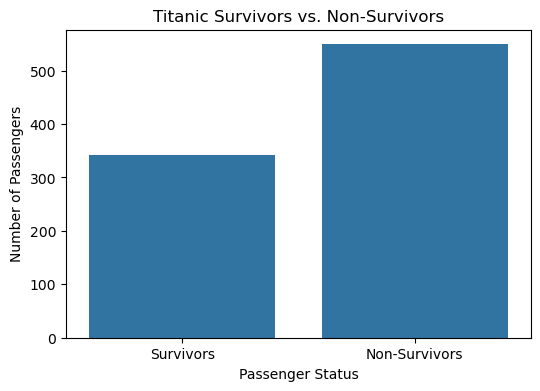

In [37]:
# Data from the previous turn
total_passengers = 891
total_survivors = 342
survival_percentage = 38.38
total_non_survivors = total_passengers - total_survivors

# Create a bar chart to visualize the number of survivors and non-survivors
plt.figure(figsize=(6, 4))  # Adjust figure size for better readability
categories = ['Survivors', 'Non-Survivors']
counts = [total_survivors, total_non_survivors]

sns.barplot(x=categories, y=counts)  # Create bar plot with categories and counts
plt.xlabel('Passenger Status')  # Label the x-axis
plt.ylabel('Number of Passengers')  # Label the y-axis
plt.title('Titanic Survivors vs. Non-Survivors')  # Add a title
plt.show()  # Display the plot


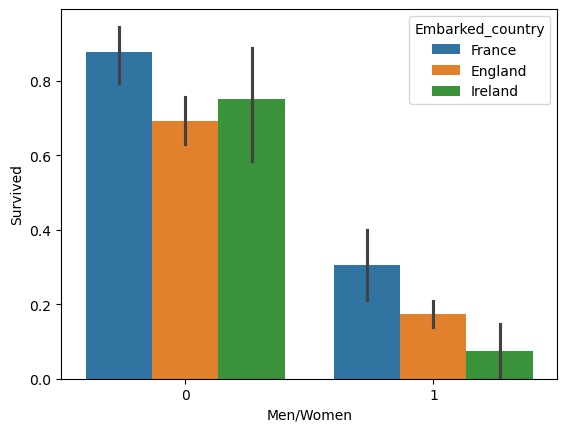

In [38]:
sns.barplot(x='Sex',y ='Survived',hue='Embarked_country',data = df)
plt.xlabel('Men/Women')
plt.show()

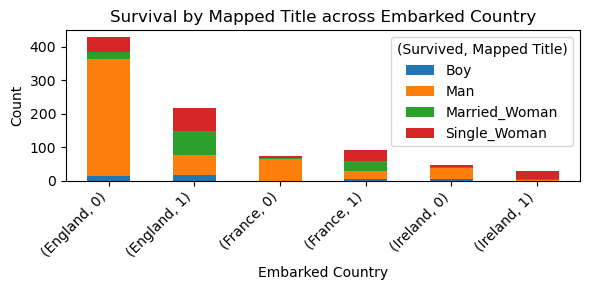

In [39]:
# Create a stacked bar chart to visualize the survival count by mapped title for each embarked country
grouped_data.plot(kind='bar', stacked=True, figsize=(6, 3))
plt.title('Survival by Mapped Title across Embarked Country')
plt.xlabel('Embarked Country')
plt.ylabel('Count')
plt.legend(title='(Survived, Mapped Title)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [40]:
# You can also check the unique values in the new column to verify
print("\nUnique values in 'Embarked_Country':", df['Embarked_country'].unique())


Unique values in 'Embarked_Country': ['England' 'France' 'Ireland']


<Axes: xlabel='Sex', ylabel='Survived'>

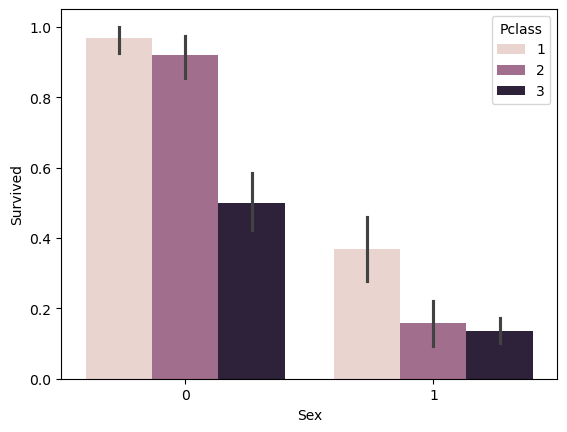

In [41]:
sns.barplot(x='Sex',y='Survived',hue ='Pclass',data = df)

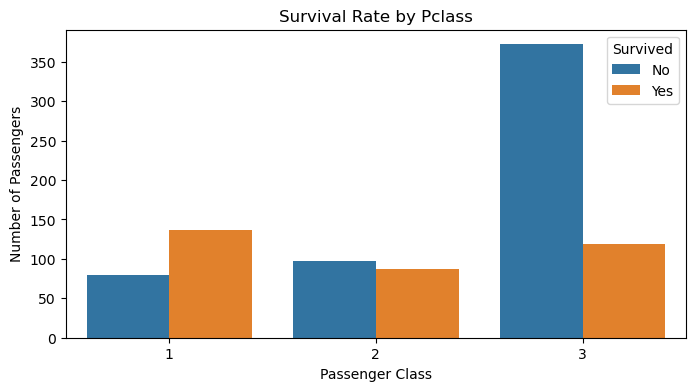

In [42]:

# Create the grouped bar chart
plt.figure(figsize=(8, 4))
sns.countplot(x='Pclass', hue='Survived',  data=df)
plt.title('Survival Rate by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


<Figure size 800x600 with 0 Axes>

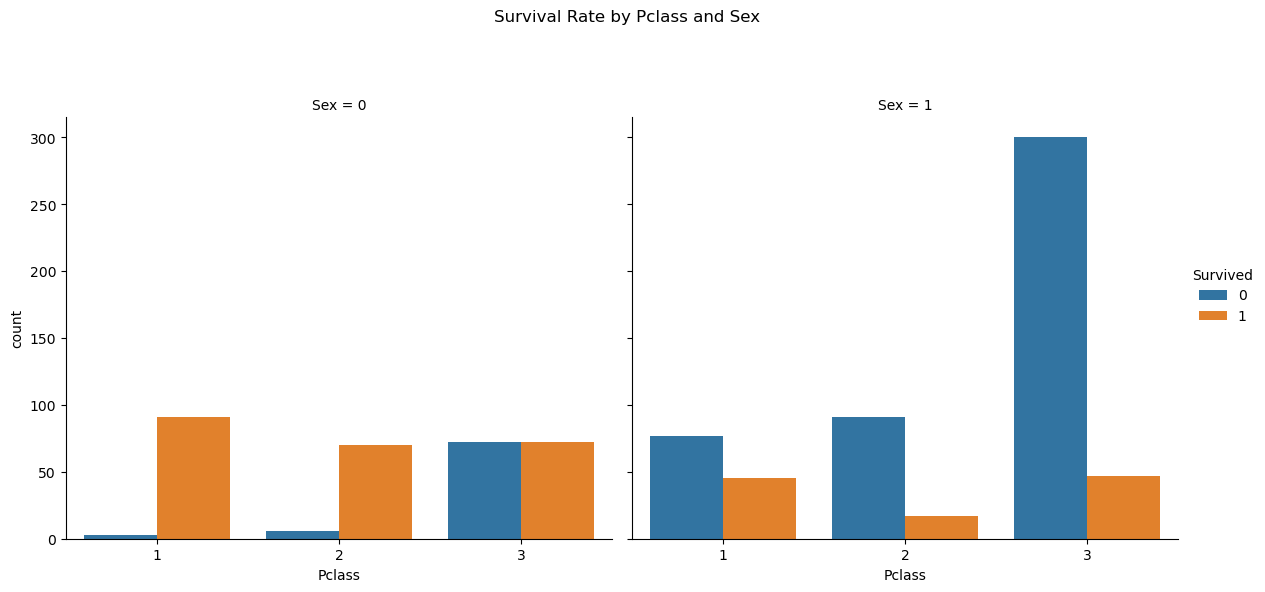

In [43]:
# 2 Question :-  Create a grouped bar chart with separate plots by Sex

plt.figure(figsize=(8,6))
sns.catplot(x='Pclass', hue='Survived', col='Sex', data=df, kind='count', height=6, aspect=1)
plt.subplots_adjust(top=0.8)
plt.suptitle('Survival Rate by Pclass and Sex')
#plt.xlabel('Passenger class')
plt.ylabel('Number of passengers')
plt.show()

In [44]:
df[['Fare','Survived']].head(3)

,Fare,Survived
0,7.2500,0
1,71.2833,1
2,7.9250,1


In [45]:
# 3 Question :- What is the correlation between Fare and survival?

correlation = df['Fare'].corr(df['Survived'])
print(f'Correlation between Fare and Survival is {correlation:.2f}')

Correlation between Fare and Survival is 0.26


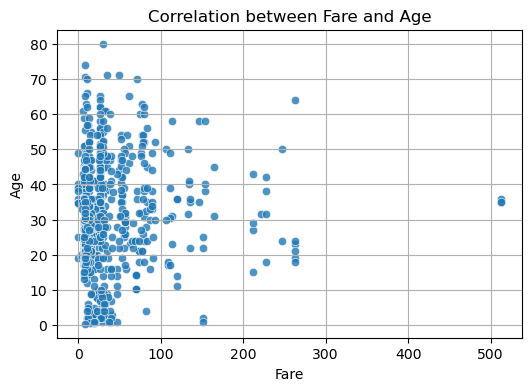

In [46]:
# Creating the scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Fare', y='predict_age_imputed', data=df, alpha=0.8)  # Added alpha for better visibility
plt.title('Correlation between Fare and Age')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.grid(True)  # Adding gridlines for easier reading
plt.show()


In [ ]:
df.head(3)

In [ ]:
#4 Question :- What is the impact of family size (FamilySize) on survival rates?

survival_by_familysize = df.groupby('family_size')['Survived'].mean().reset_index()
print(survival_by_familysize)

plt.figure(figsize=(8,4))
sns.barplot(y='Survived',x='family_size',data=survival_by_familysize)
plt.title(' survival rates by FamilySize')
plt.xlabel('family_size')
plt.ylabel('Survival Rate')
plt.show()


In [ ]:
# 5 :- Are passengers who embarked from certain locations more likely to survive?

survival_df = df[df['Survived'] == 1] 

embarked_survival = survival_df.groupby('Embarked_country')['Survived'].count()
print(embarked_survival)

#creating bar plot

# Now use original DataFrame (not grouped one) for the plot
plt.figure(figsize=(6,3))
sns.countplot(x='Embarked_country',data=survival_df)
'''plt.title('Survivors by Embarkation Country and Sex')
plt.xlabel('Embarked country')
plt.ylabel('Number of survivor')
plt.tight_layout()
plt.show()'''

In [ ]:
df.head(2)

In [ ]:
# 6 Question How does age distribution impact survival?

plt.figure(figsize=(6,3))
sns.lineplot(x='Age Category',y='Survived',data = df)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(x='Age Category',hue='Survived',data = survival_df)
plt.tight_layout()
plt.show()


In [ ]:
df.head(3)

In [ ]:
df.drop('Title',axis=1,inplace=True)

In [ ]:
df.to_excel

In [ ]:
df.to_csv('titanic clean dataset utf.csv', index=False,encoding='utf-8')

In [ ]:
df.isnull().sum()

In [ ]:
df.dtypes